In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [86]:
df=pd.read_csv("/Users/muhammetbakir/Desktop/udmy_veri_bilimi/videodan_bakip_yazdiklarim/data/11-iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [88]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


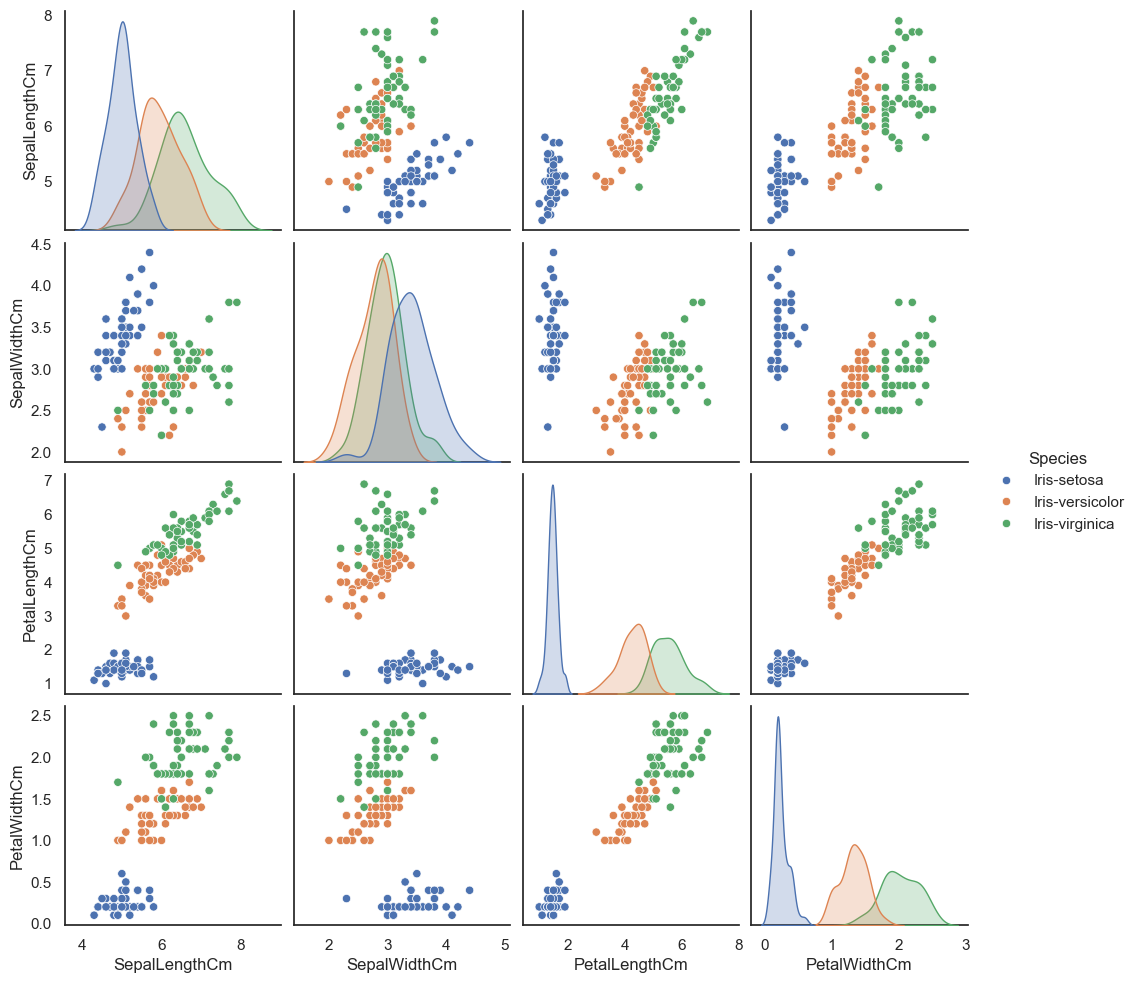

In [90]:
sns.pairplot(df.drop("Id", axis=1), hue="Species")
plt.show()

In [91]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

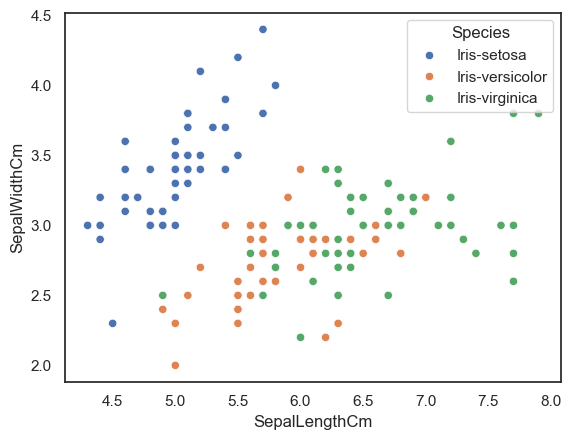

In [92]:
sns.scatterplot(x=df["SepalLengthCm"],y=df["SepalWidthCm"],hue=df["Species"])
plt.show()

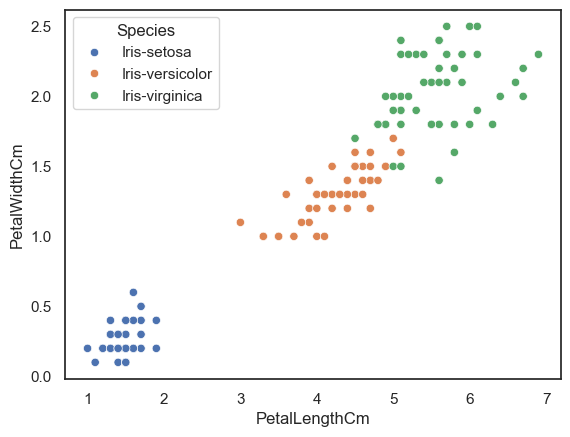

In [93]:
sns.scatterplot(x=df["PetalLengthCm"],y=df["PetalWidthCm"],hue=df["Species"])
plt.show()

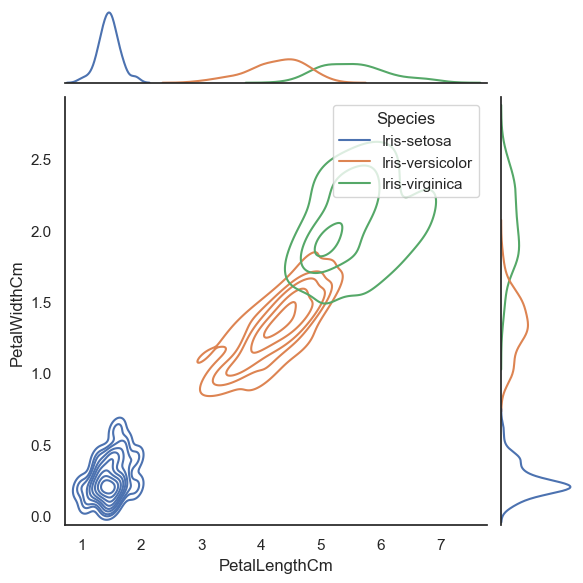

In [94]:
sns.set(style="white", color_codes=True)
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=df, hue="Species", kind="kde")
plt.show()

In [95]:
df=df.drop("Id",axis=1)

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
label_encoder=LabelEncoder()
df["Species"]=label_encoder.fit_transform(df["Species"])

In [98]:
df.Species.value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [99]:
X=df.drop("Species",axis=1)
y=df["Species"]

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [104]:
from sklearn.naive_bayes import GaussianNB

In [105]:
gnb=GaussianNB()

In [106]:
gnb.fit(X_train_scaled,y_train)
y_pred=gnb.predict(X_test_scaled)

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [108]:
print("confusion matrix: \n", confusion_matrix(y_pred,y_test))
print("accuarcy score: \n", accuracy_score(y_pred,y_test))
print("classification report: \n", classification_report(y_pred,y_test))

confusion matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuarcy score: 
 1.0
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [113]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
y_pred_log=log_reg.predict(X_test_scaled)
print("confusion matrix: \n", confusion_matrix(y_test,y_pred_log))
print("accuarcy score: \n", accuracy_score(y_test,y_pred_log))
print("classification report: \n", classification_report(y_test,y_pred_log))

confusion matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuarcy score: 
 1.0
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [110]:
from sklearn.svm import SVC 

sigmoid=SVC(kernel="sigmoid")
sigmoid.fit(X_train_scaled,y_train)
y_pred_sig=sigmoid.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred_sig))
print(classification_report(y_test,y_pred_sig))

[[12  0  0]
 [ 0 12  2]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.86      0.89        14
           2       0.85      0.92      0.88        12

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

